In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
train_df = pd.read_csv('../train.csv')
train_df.species.replace({"globis": "short_finned_pilot_whale",
                          "pilot_whale": "short_finned_pilot_whale",
                          "kiler_whale": "killer_whale",
                          "bottlenose_dolpin": "bottlenose_dolphin"}, inplace=True)

/var/folders/3x/xv4sp89x49z5ctls1tw24k5c0000gn/T/ipykernel_71601/1968437012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.species.replace({"globis": "short_finned_pilot_whale",


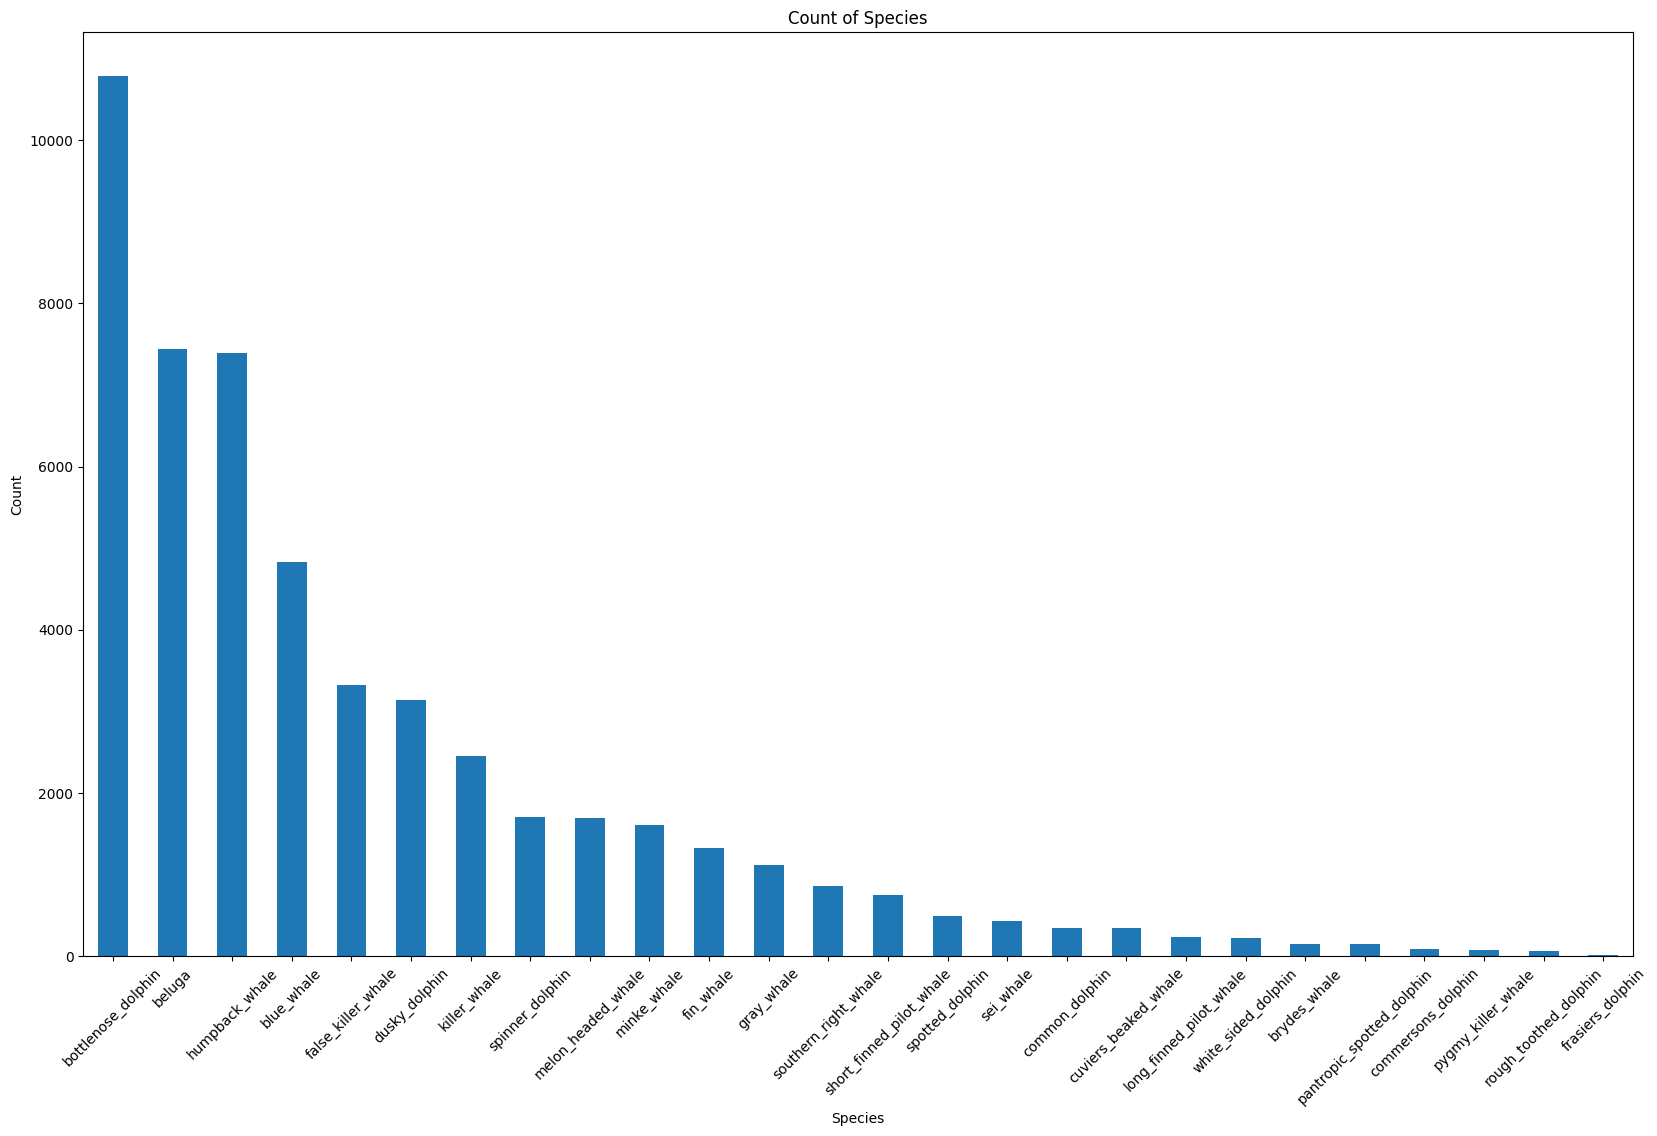

In [23]:
species_counts = train_df['species'].value_counts()

species_counts.plot(kind='bar', figsize=(20, 12))

plt.title('Count of Species')
plt.xlabel('Species')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)


plt.savefig('species_histogram.png', bbox_inches='tight')

# Display the plot
plt.show()

In [24]:
# Calculate the count of individual_id for each group (species)
individual_counts = train_df.groupby(['species', 'individual_id']).size().reset_index(name='count')

# Calculate the average count of individuals per species
avg_individual_instances = individual_counts.groupby('species')['count'].mean().reset_index()

# Rename the columns for clarity
avg_individual_instances.columns = ['species', 'avg_instances']

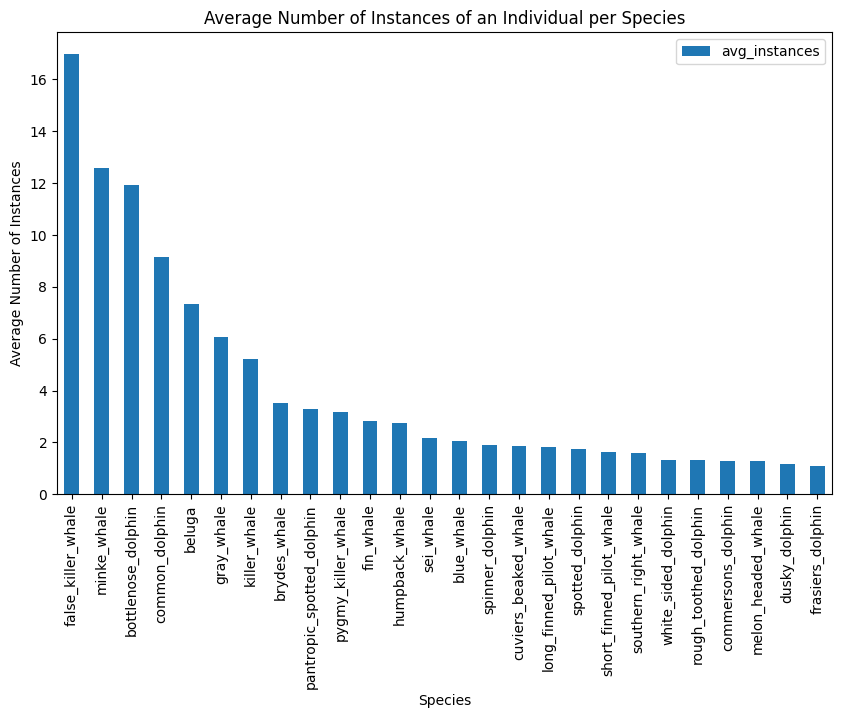

In [33]:
# Sort the DataFrame by 'avg_instances' in descending order
avg_individual_instances = avg_individual_instances.sort_values(by='avg_instances', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
avg_individual_instances.plot(kind='bar', x='species', y='avg_instances', ax=ax)

# Add title and axis labels
ax.set_title('Average Number of Instances of an Individual per Species')
ax.set_xlabel('Species')
ax.set_ylabel('Average Number of Instances')

plt.savefig('mean_individuals_histogram.png', bbox_inches='tight')

# Display the plot
plt.show()

In [35]:
bottlenose_dolphin_df = df[df['species'] == "bottlenose_dolphin"]

# Number of images
len(bottlenose_dolphin_df)

9664

In [39]:
bottlenose_dolphin_df['individual_id'].nunique()

613

In [41]:
bottlenose_dolphin_df.head()

,image,species,individual_id
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
5,000a8f2d5c316a.jpg,bottlenose_dolphin,b9907151f66e
9,000c476c11bad5.jpg,bottlenose_dolphin,b11b2404c7e3
12,00144776eb476d.jpg,bottlenose_dolphin,b9907151f66e
14,00177f3c614d1e.jpg,bottlenose_dolphin,812be36c2aef
